# Basic Data Analysis: 2017 vs 2020

## 1. Import data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyreadstat
import seaborn as sns

In [2]:
# load 2017 survey data (sav file)
file_path_2014 = '2014_survey_data.sav'
file_path_2017 = '2017_survey_data.sav'
file_path_2020 = '2020_survey_data.csv'
df14, meta = pyreadstat.read_sav(file_path_2014)
df17, meta = pyreadstat.read_sav(file_path_2017)
df20 = pd.read_csv(file_path_2020)

## 2. Data Visualization

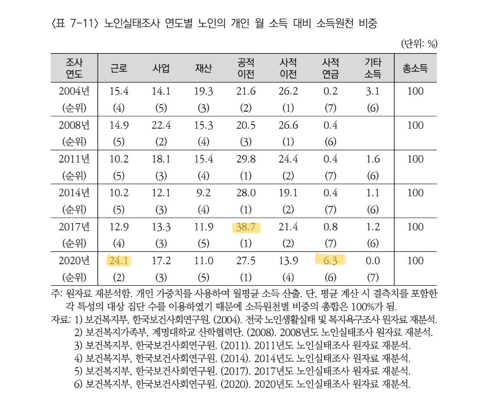

In [3]:
from IPython.display import display
from PIL import Image as PILImage
img = PILImage.open('images/change_by_time.jpg')
img.thumbnail((500, 400))  # Replace 'width' and 'height' with desired values
display(img)

확인해볼 문제는 세가지입니다:
1. 2017년과 2020년 사이 근로소득이 크게 늘어났습니다. 원인이 무엇일까요?
2. 2014년과 2017년 사이 공적이전소득이 크게 늘어나고, 2017년과 2020년 사이 다시 줄었습니다. 원인이 무엇일까요?
3. 2017년과 2020년 사이 사적연금이 크게 늘었습니다. 원인이 무엇일까요?

### 2.1. 17년과 20년 사이 근로소득의 상승 

일단 첫째, 2017년과 2020년 사이 근로소득의 큰 상승의 원인이 무엇일까요? 지금 떠오르는 것은 아래와 같습니다:

1. 베이비부머 세대의 노인층 편입 
    - 2017년 기준 만 65세: 1952년생
    - 2020년 기준 만 65세: 1955년생
2. 노인일자리 정책의 효과

고로:
- 첫째로는 17년과 20년의 나이 분포를 5년 단위로 쪼개서 파이차트를 그려봅니다. 전기 노인의 비중이 이 3년 사이에 가시적으로 늘어났나 확인해봅니다.
- 둘째로는 17년과 20년의 근로소득 분포를 살펴봅니다.
- 셋째로는 17년과 20년의 연령별 근로소득 분포를 살펴봅니다. 

17년과 20년 데이터의 중요 컬럼을 살펴봅니다:
17년:
- ID_A4_2: 응답자 만연령
- N3_1_1_a	본인_근로소득_유무	(있음: 1, 없음: 2, 무응답: 8)
- N3_1_1_b	본인_근로소득_금액	(무응답: 999998)

20년:
- RES_AGE: 응답자 만연령
- J3a_1_1: 본인_근로소득_유무 (있음: 1 없음: 2)
- J3b_1_1	본인_근로소득_금액 (모름/무응답:999998, 비해당: 999999)

*첫째로는 17년과 20년의 나이 분포를 5년 단위로 쪼개서 파이차트를 그려봅니다. 전기 노인의 비중이 이 3년 사이에 가시적으로 늘어났나 확인해봅니다.*

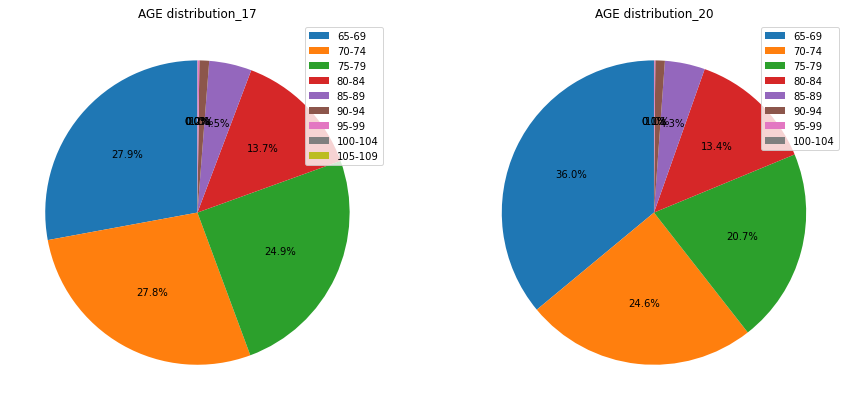

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a function for the repetitive process
def prepare_grouped(df, column):
    max_value = int(df[column].max())
    bins = list(range(65, max_value + 5, 5))
    labels = ['{}-{}'.format(i, i + 4) for i in range(65, max_value, 5)]
    df['Interval'] = pd.cut(df[column], bins=bins, labels=labels, right=True)
    return df.groupby('Interval').size()

# Prepare grouped data
grouped_17 = prepare_grouped(df17, 'ID_A4_2')
grouped_20 = prepare_grouped(df20, 'RES_AGE')

# Plot the two pie charts in the same figure
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

ax[0].pie(grouped_17, autopct='%1.1f%%', startangle=90)
ax[0].set_title('AGE distribution_17')
ax[0].legend(grouped_17.index, loc="upper right")

ax[1].pie(grouped_20, autopct='%1.1f%%', startangle=90)
ax[1].set_title('AGE distribution_20')
ax[1].legend(grouped_20.index, loc="upper right")

plt.show()

전기 노인의 비중이 크게 늘어났음을 볼 수 있습니다. 

*둘째로는 17년과 20년의 근로소득여부 + 근로소득 금액 분포를 살펴봅니다. (확인해본 결과 결측치 없음)*

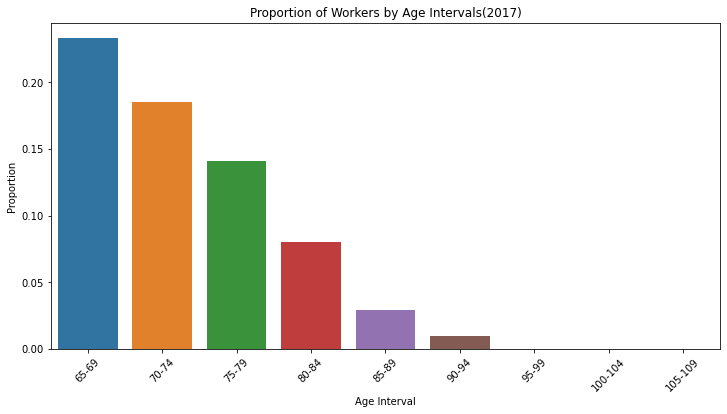

In [5]:
df17_grouped = df17.groupby('Interval')['N3_1_1_a'].apply(lambda x: (x == 1).mean())
df17_grouped = df17_grouped.reset_index()
df17_sorted = df17_grouped.sort_values('Interval')

plt.figure(figsize=(12, 6))
sns.barplot(x='Interval', y='N3_1_1_a', data=df17_sorted)
plt.title('Proportion of Workers by Age Intervals(2017)')
plt.ylabel('Proportion')
plt.xlabel('Age Interval')
plt.xticks(rotation=45)
plt.show()

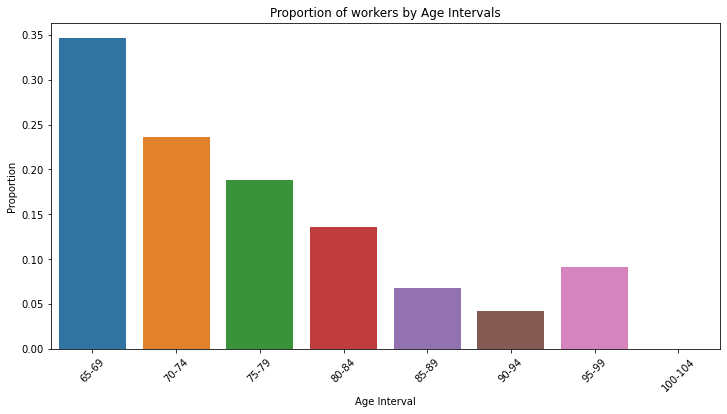

In [6]:
# Group by 'Interval' and calculate the proportion of '1's in 'J3b_1_1'
df20_grouped = df20.groupby('Interval')['J3a_1_1'].apply(lambda x: (x == 1).mean())
# Reset the index (this will turn 'Interval' back into a column)
df20_grouped = df20_grouped.reset_index()

# Sort DataFrame by 'Interval' before plotting
df20_sorted = df20_grouped.sort_values('Interval')

# Create a barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='Interval', y='J3a_1_1', data=df20_sorted)
plt.title('Proportion of workers by Age Intervals')
plt.ylabel('Proportion')
plt.xlabel('Age Interval')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


In [7]:
count = df20[(df20["RES_AGE"] >= 96) & (df20["RES_AGE"] <= 99) ].shape[0]
print(f'The number of data points with RES_AGE between 95 and 99 inclusive is: {count}')
count = df20[(df20["RES_AGE"] >= 95) & (df20["RES_AGE"] <= 99) & (df20['J3a_1_1']==1)].shape[0]
print(f'The number of data points with RES_AGE between 95 and 99 inclusive who works is: {count}')

The number of data points with RES_AGE between 95 and 99 inclusive is: 11
The number of data points with RES_AGE between 95 and 99 inclusive who works is: 1


95-99 구간의 튀어오름은 무시해도 괜찮아 보이네요. 11명 중 1명입니다.

*셋째로는 17년과 20년의 연령별 근로소득 분포를 살펴봅니다.*

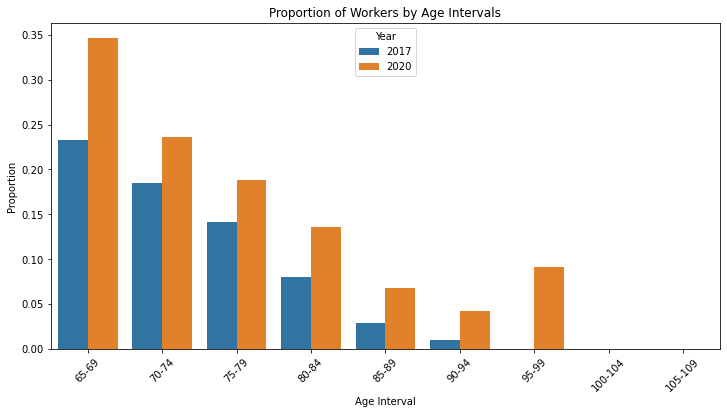

In [8]:
# Add a 'Year' column to each DataFrame
df17_sorted['Year'] = 2017
df20_sorted['Year'] = 2020

# Rename the proportion column to a common name
df17_sorted = df17_sorted.rename(columns={'N3_1_1_a': 'Proportion'})
df20_sorted = df20_sorted.rename(columns={'J3a_1_1': 'Proportion'})

# Combine the dataframes
df_combined = pd.concat([df17_sorted, df20_sorted])

# Convert the 'Interval' column to string type
df_combined['Interval'] = df_combined['Interval'].astype(str)

# Extract the lower bound from each interval and convert it to integer
df_combined['Lower_Bound'] = df_combined['Interval'].apply(lambda x: int(x.split('-')[0]))

# Sort the DataFrame by 'Lower_Bound'
df_combined_sorted = df_combined.sort_values('Lower_Bound')

# Create a barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='Interval', y='Proportion', hue='Year', data=df_combined_sorted)
plt.title('Proportion of Workers by Age Intervals')
plt.ylabel('Proportion')
plt.xlabel('Age Interval')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


위와 같이 추세를 보면, 비단 전기 노인의 유입 뿐만이 아니라, 전체적으로 노동참여율이 높아짐을 볼 수 있습니다. 

그 다음 근로소득의 액수도 살펴봅니다.

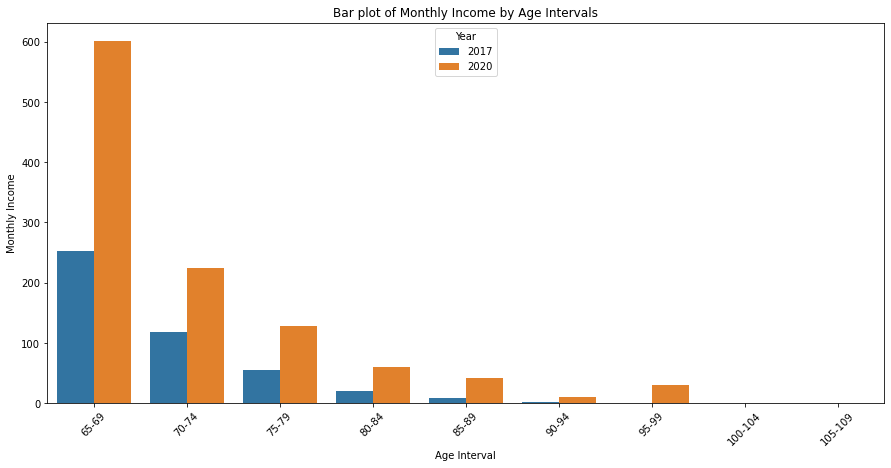

In [9]:
df17_grouped = df17.groupby('Interval')['N3_1_1_b'].mean()
df17_grouped = df17_grouped.reset_index()
df17_grouped['Interval'] = pd.Categorical(df17_grouped['Interval'], categories=df17_grouped['Interval'].unique(), ordered=True)
df17_sorted = df17_grouped.sort_values('Interval')
df17_sorted['Year'] = '2017'

df20_grouped = df20.groupby('Interval')['J3b_1_1'].mean()
df20_grouped = df20_grouped.reset_index()
df20_grouped['Interval'] = pd.Categorical(df20_grouped['Interval'], categories=df20_grouped['Interval'].unique(), ordered=True)
df20_sorted = df20_grouped.sort_values('Interval')
df20_sorted['Year'] = '2020'

df_combined = pd.concat([df17_sorted, df20_sorted.rename(columns={'J3b_1_1': 'N3_1_1_b'})])

plt.figure(figsize=(15, 7))
sns.barplot(x='Interval', y='N3_1_1_b', hue='Year', data=df_combined, capsize=.2)
plt.title('Bar plot of Monthly Income by Age Intervals')
plt.ylabel('Monthly Income')
plt.xlabel('Age Interval')
plt.xticks(rotation=45)
plt.show()


전체적으로 금액이 급등했음을 알 수 있습니다.

요약을 하자면:
1. 17년과 20년 사이 초기노인의 유입이 늘어났습니다.
2. 전연령에 걸쳐 노동을 하는 노인의 비중이 전연령에 걸쳐 유의미하게 늘어났습니다.
3. 전연령에 걸쳐 근로소득 액수도 눈에 띄게 늘어났습니다.

그 다음 할 수 있는 것은 노인일자리 정책에 대한 정보 시각화가 있겠군요.

### 2.2 일자리 정책 참여의 상승

In [ ]:
그 다음으론 일자리 정책의 참여를 살펴봅니다. 사실 제가 직접 그리는 것 보다도, 다른 보고서에 상세히 기술 된 것 같아 스크린샷을 남깁니다. 